In [1]:
import numpy as np
from ucimlrepo import fetch_ucirepo 

from neural_network import NeuralNetwork

from preprocessing import min_max_scaler, train_test_split
from activation import LeakyRelu, Softmax, Sigmoid, Relu
from loss import CategoricalCrossentropy, BinaryCrossentropy
from optimizer import Adam, SGD
from scheduler import FactorScheduler, CosineScheduler  
from config import FeedForwardConfig, TrainingConfig
from core import ParameterLoader
from structure import Layer

In [6]:
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 

X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

X = X.to_numpy()
y = y.to_numpy(dtype=str)

X, y

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 array([['M'],
        ['M'],
        ['M'],
        ['M'],
        ['M'],
        ['M'],
        ['M'],
        ['M'],
        ['M'],
        ['M'],
        ['M'],
        ['M'],
        ['M'],
        ['M'],
        ['M'],
        ['M'],
        ['M'],
        ['M'],
        ['M'],
        ['B'],
        ['B'],
        ['B'],
        ['M'],
        ['M'],
        ['M'],
        ['M'],
        ['M'],
        ['M'],
        ['M'],
        ['

In [4]:
classes = tuple(np.unique(y))

# Normalize data
data = min_max_scaler(X, -1, 1)

# Combine data and labels into a structured array
combined = np.array([(d, label[0]) for d, label in zip(data, y)], dtype=object)

# Split data into training and testing sets
train, test = train_test_split(combined, random_state=0)

classes, train, test

((np.str_('B'), np.str_('M')),
 array([[array([-0.31194093, -0.18769023, -0.31117407, -0.58472959, -0.17667238,
                -0.4453101 , -0.3819119 , -0.44353877, -0.16666667, -0.52443134,
                -0.87361941, -0.70880481, -0.82094897, -0.93235686, -0.7168304 ,
                -0.58395169, -0.75681818, -0.56014397, -0.65109473, -0.78392272,
                -0.4336535 , -0.02238806, -0.34468848, -0.69799449, -0.03017896,
                -0.23060803, -0.1715655 , -0.00549828, -0.20126158, -0.39184048]),
         np.str_('M')],
        [array([-0.17184912, -0.8938113 , -0.18443784, -0.4878473 , -0.06707592,
                -0.32200478, -0.44189316, -0.38260437, -0.26868687, -0.46798652,
                -0.96270143, -0.98810997, -0.96362437, -0.97359721, -0.70622429,
                -0.76044702, -0.83151515, -0.59575677, -0.89114651, -0.90594641,
                -0.35396656, -0.88379531, -0.38154291, -0.67110696,  0.09529155,
                -0.47490565, -0.36038339, -0.0020618

Epoch 0, Accuracy: 0.9580, Loss: 0.0915, train_acc: 0.9413
Epoch 1, Accuracy: 0.9580, Loss: 0.1080, train_acc: 0.9531
Epoch 2, Accuracy: 0.9580, Loss: 0.0563, train_acc: 0.9718
Epoch 3, Accuracy: 0.9580, Loss: 0.0869, train_acc: 0.9554
Epoch 4, Accuracy: 0.9510, Loss: 0.0704, train_acc: 0.9695
Epoch 5, Accuracy: 0.9650, Loss: 0.0845, train_acc: 0.9671
Epoch 6, Accuracy: 0.9650, Loss: 0.0681, train_acc: 0.9671
Epoch 7, Accuracy: 0.9510, Loss: 0.0775, train_acc: 0.9624
Epoch 8, Accuracy: 0.9580, Loss: 0.0728, train_acc: 0.9718
Epoch 9, Accuracy: 0.9650, Loss: 0.0681, train_acc: 0.9695
Epoch 10, Accuracy: 0.9650, Loss: 0.0563, train_acc: 0.9718
Epoch 11, Accuracy: 0.9650, Loss: 0.0587, train_acc: 0.9695
Epoch 12, Accuracy: 0.9580, Loss: 0.0493, train_acc: 0.9718
Epoch 13, Accuracy: 0.9650, Loss: 0.0516, train_acc: 0.9671
Epoch 14, Accuracy: 0.9790, Loss: 0.0493, train_acc: 0.9765
Epoch 15, Accuracy: 0.9720, Loss: 0.0563, train_acc: 0.9765
Epoch 16, Accuracy: 0.9441, Loss: 0.0282, train_ac

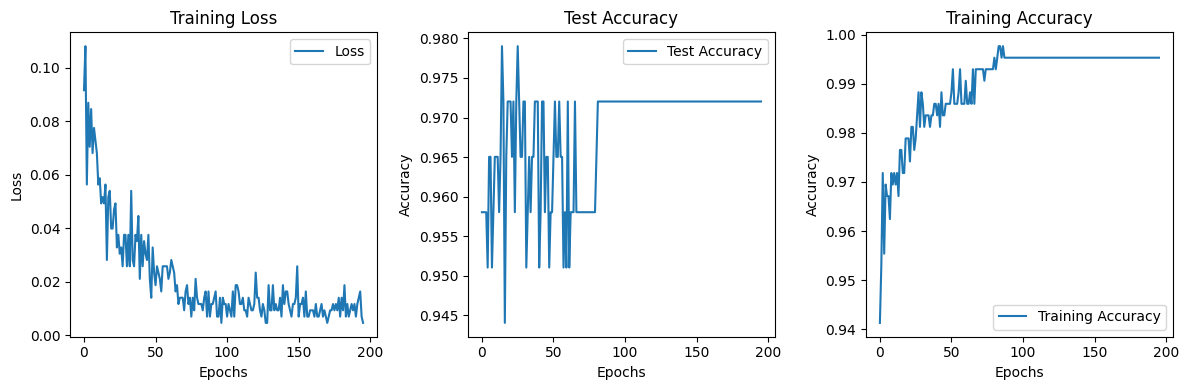

final test: 0.9789103690685413, test: 0.9790209790209791, train: 0.9788732394366197


In [4]:
config = FeedForwardConfig(
    network_structure=[len(X[0]), 16, 8, len(classes)],
    classes=classes,
    hidden_activation=LeakyRelu(),
    output_activation=Softmax(),
)

nn = NeuralNetwork(config)

nn.train(
    list(train),
    list(test),
    config=TrainingConfig(
        lr=CosineScheduler(max_steps=100),
        patience_stop=100,
        loss=CategoricalCrossentropy(),
        optimizer=SGD(momentum=0.9, nesterov=True),
        batch_size=4,
        dropout=0.1, 
        debug=True,
        store=False,
    ),
)

print(f"final test: {nn.evaluate(list(combined))}, test: {nn.evaluate(list(test))}, train: {nn.evaluate(list(train))}")

Epoch 0, Accuracy: 0.8322, Loss: 0.5392, train_acc: 0.8498
Epoch 1, Accuracy: 0.9580, Loss: 0.3230, train_acc: 0.9577
Epoch 2, Accuracy: 0.9580, Loss: 0.1854, train_acc: 0.9577
Epoch 3, Accuracy: 0.9580, Loss: 0.1655, train_acc: 0.9695
Epoch 4, Accuracy: 0.9650, Loss: 0.1377, train_acc: 0.9765
Epoch 5, Accuracy: 0.9580, Loss: 0.1099, train_acc: 0.9718
Epoch 6, Accuracy: 0.9650, Loss: 0.1009, train_acc: 0.9742
Epoch 7, Accuracy: 0.9650, Loss: 0.1163, train_acc: 0.9789
Epoch 8, Accuracy: 0.9720, Loss: 0.0806, train_acc: 0.9789
Epoch 9, Accuracy: 0.9720, Loss: 0.0956, train_acc: 0.9765
Epoch 10, Accuracy: 0.9720, Loss: 0.0899, train_acc: 0.9812
Epoch 11, Accuracy: 0.9720, Loss: 0.0975, train_acc: 0.9812
Epoch 12, Accuracy: 0.9650, Loss: 0.0892, train_acc: 0.9836
Epoch 13, Accuracy: 0.9790, Loss: 0.0850, train_acc: 0.9836
Epoch 14, Accuracy: 0.9790, Loss: 0.0892, train_acc: 0.9812
Epoch 15, Accuracy: 0.9790, Loss: 0.0778, train_acc: 0.9859
Epoch 16, Accuracy: 0.9720, Loss: 0.0697, train_ac

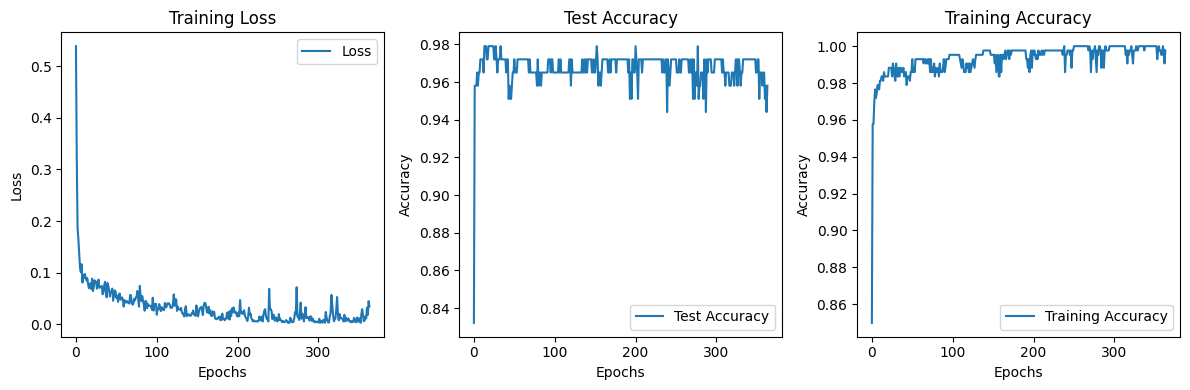

final test: 0.9894551845342706, test: 0.9790209790209791, train: 0.9929577464788732


In [5]:
config = FeedForwardConfig(
    network_structure=[
        Layer(len(X[0])),
        Layer(16),
        Layer(8),
        Layer(1)
    ],
    classes=classes,
    hidden_activation=LeakyRelu(),
    output_activation=Sigmoid(),
)

nn = NeuralNetwork(config)

nn.train(
    list(train),
    list(test),
    config=TrainingConfig(
        lr=CosineScheduler(learning_rate=0.001, min_lr=0.0001, max_steps=20, cyclic=True),
        patience_stop=100,
        loss=BinaryCrossentropy(),
        optimizer=Adam(),
        batch_size=4,
        dropout=0.1, 
        debug=True,
        store=False,
    ),
)

print(f"final test: {nn.evaluate(list(combined))}, test: {nn.evaluate(list(test))}, train: {nn.evaluate(list(train))}")